## MultiGraph
Create 3 views:
* A view on a randomly generated stock price
* A view on a moving average of the last 50 stock prices
* A view on a moving average of the last 150 stock prices

In [1]:
from streamsx.topology.topology import Topology
from streamsx.topology import context
from some_module import jsonRandomWalk, movingAverage
#from streamsx import rest
import json

# Define operators
rw = jsonRandomWalk()
ma_150 = movingAverage(150)
ma_50 = movingAverage(50)

# Define topology & submit
top = Topology("myTop")
ticker_price = top.source(rw)
ma_150_stream = ticker_price.map(ma_150)
ma_50_stream = ticker_price.map(ma_50)

## Code the user can supply to view the streaming data 

Given the streams with the 3 different moving averages, create 3 separate views to obtain the data.

In [2]:
ticker_view = ticker_price.view()
ma_150_view = ma_150_stream.view()
ma_50_view = ma_50_stream.view()

## Submit To Distributed Streams Install

In [3]:
context.submit("DISTRIBUTED", top.graph, username = "streamsadmin", password = "passw0rd")

2016-11-17 02:07:39,455 - streamsx.topology.py_submit - INFO - Generating SPL and submitting application.


Nov 17, 2016 2:07:42 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: Invoking spl-make-toolkit
Nov 17, 2016 2:07:42 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: /opt/ibm/InfoSphere_Streams/4.2.0.0/bin/spl-make-toolkit --make-operator -i /home/streamsadmin/git/streamsx.topology/samples/python/topology/notebooks/MultiGraph/tk7034316274430990980
Nov 17, 2016 2:07:44 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: spl-make-toolkit complete: return code=0
Nov 17, 2016 2:07:44 AM com.ibm.streamsx.topology.internal.streams.InvokeSc getToolkitPath
INFO: ToolkitPath:/home/streamsadmin/git/streamsx.topology/com.ibm.streamsx.topology:/opt/ibm/InfoSphere_Streams/4.2.0.0/toolkits
Nov 17, 2016 2:07:44 AM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
INFO: Invoking SPL compiler (sc) for main composite: myTop::myTop
Nov 17, 2016 2:07:44 AM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
IN

## Graph The Stock Price & Moving Averages

<IPython.core.display.Javascript object>


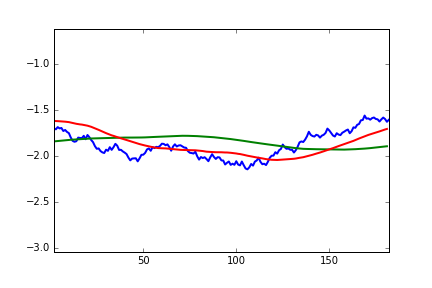

KeyboardInterrupt: 

In [5]:
%matplotlib inline
%matplotlib notebook

from streamsx.rest import multi_graph_every

l = [ticker_view, ma_150_view, ma_50_view]
multi_graph_every(l, 'val', 1.0)